In [1]:
import numpy as np
import functions as func
import matplotlib.pyplot as plt
import pdb, glob, mpld3
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpld3 import plugins

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
mpld3.enable_notebook()

In [81]:
fnames = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/*_bcd.fits'))
len(fnames)

20

In [82]:
hdu    = fits.open(fnames[2])
header = hdu[0].header
image  = hdu[0].data
hdu.info()
hdu.close()

Filename: /data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0001_0000_6_bcd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     295   (256, 256)   float32   


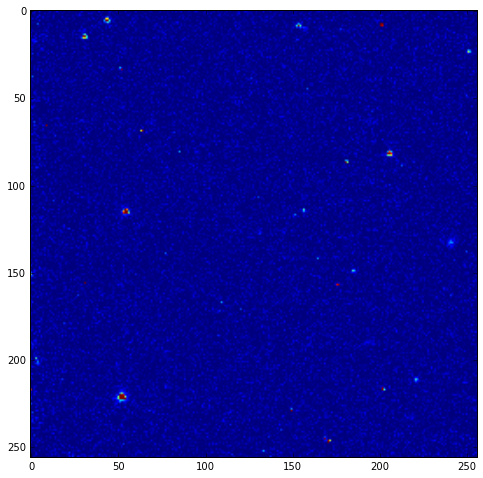

In [83]:
plt.imshow(image, vmin = 0, vmax = 10)

In [67]:
c = SkyCoord('17 24 52.2772360943 +60 25 50.780790994', unit=(u.hourangle, u.deg))
d = c.to_pixel(WCS(header))
c, d

(<SkyCoord (ICRS): (ra, dec) in deg
     ( 261.21782182,  60.43077244)>,
 (array(467.8066000384907), array(118.26041046501975)))

In [86]:
fnames[1::2]

array([ '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0000_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0001_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0002_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0003_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0004_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0005_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0006_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0007_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0008_0001_6_bcd.fits',
       '/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_00

In [77]:
fnames[4][71:75]

'0002'

In [87]:
sky = SkyCoord('17 24 52.2772360943 +60 25 50.780790994', unit=(u.hourangle, u.deg))

for fname in fnames[1::2]:
    hdu    = fits.open(fname)
    header = hdu[0].header
    hdu.close()
    
    w = WCS(header)
    pix = sky.to_pixel(w)
    
    plot = plt.imshow(image, origin = 'lower', vmin = 0, vmax = 4)
    
    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
        flux, ap = func.photometry(image, [pix[0]], [pix[1]], rad = 3)
        ap.plot(color='y',linewidth=1)
    
        outfile = '../CalStar_ap_test/bd601753/folder3/bd_fol3_' + fname[71:75] + '.pdf'
        plt.title(fname[76:80])
        plt.colorbar(plot)
        plt.savefig(outfile)
        plt.clf()
    else:
        plt.clf()

plt.close()